## Random Forest Built-in Feature Importance

In [2]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
# import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [4]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [5]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [6]:
rf.feature_importances_

array([0.04269424, 0.00089835, 0.00572941, 0.00256493, 0.024519  ,
       0.25426979, 0.01578473, 0.06222779, 0.00388829, 0.01697033,
       0.00878402, 0.01346687, 0.54820227])

<BarContainer object of 13 artists>

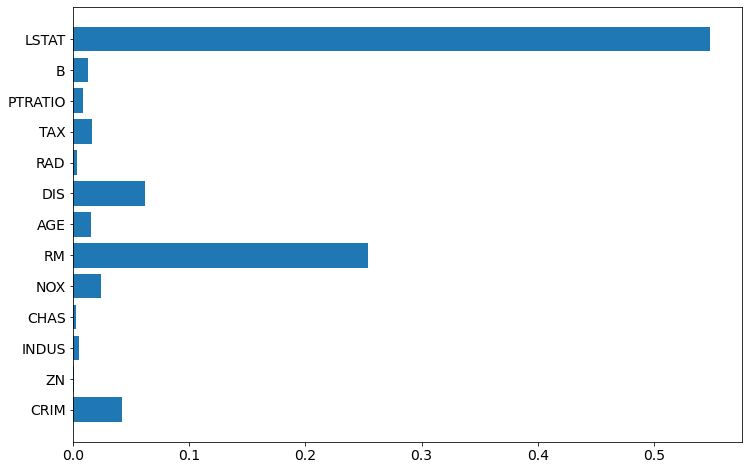

In [7]:
plt.barh(boston.feature_names, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

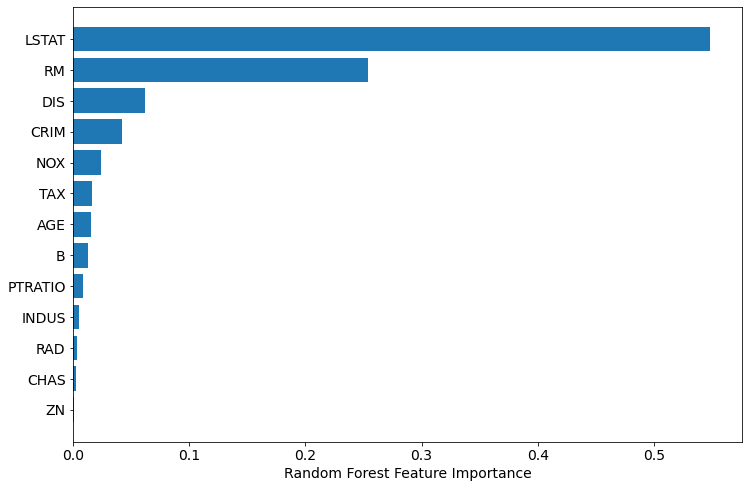

In [8]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Permutation Based Feature Importance

In [10]:
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

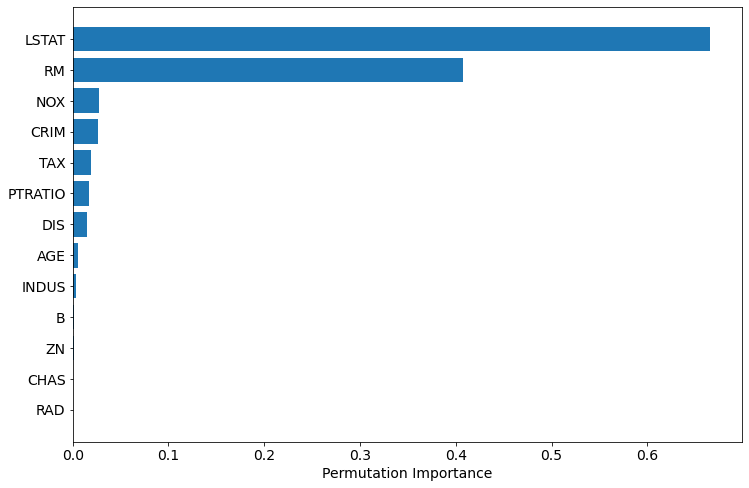

In [11]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")